In [59]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import GridSearchCV

In [2]:
column_names = ['party','handicappedInfants','waterProject','budgetResolution','physicianFee','elSalvador','religiousGroups','antiSatellite','nicaragua','missile','immigration','synfuels','education','superfund','crime','dutyFree','exportAdmin']

congress_df = pd.read_csv('https://assets.datacamp.com/production/repositories/628/datasets/35a8c54b79d559145bbeb5582de7a6169c703136/house-votes-84.csv',names=column_names)

In [ ]:
congress_df.shape

In [70]:
congress_df.head()

,party,handicappedInfants,waterProject,budgetResolution,physicianFee,elSalvador,religiousGroups,antiSatellite,nicaragua,missile,immigration,synfuels,education,superfund,crime,dutyFree,exportAdmin
0,republican,n,y,n,y,y,y,n,n,n,y,NaN,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,NaN
2,democrat,NaN,y,y,NaN,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,NaN,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,NaN,y,y,y,y


In [6]:
warnings.filterwarnings('ignore')
congress_df=congress_df.replace('?',np.nan)

In [8]:
imputer = SimpleImputer( strategy='most_frequent')

imputer.fit(congress_df)

imputed_train_df = imputer.transform(congress_df)

In [10]:
congress_filled_df = pd.DataFrame(imputed_train_df, columns = column_names)

In [71]:
congress_df.head()

,party,handicappedInfants,waterProject,budgetResolution,physicianFee,elSalvador,religiousGroups,antiSatellite,nicaragua,missile,immigration,synfuels,education,superfund,crime,dutyFree,exportAdmin
0,republican,n,y,n,y,y,y,n,n,n,y,NaN,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,NaN
2,democrat,NaN,y,y,NaN,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,NaN,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,NaN,y,y,y,y


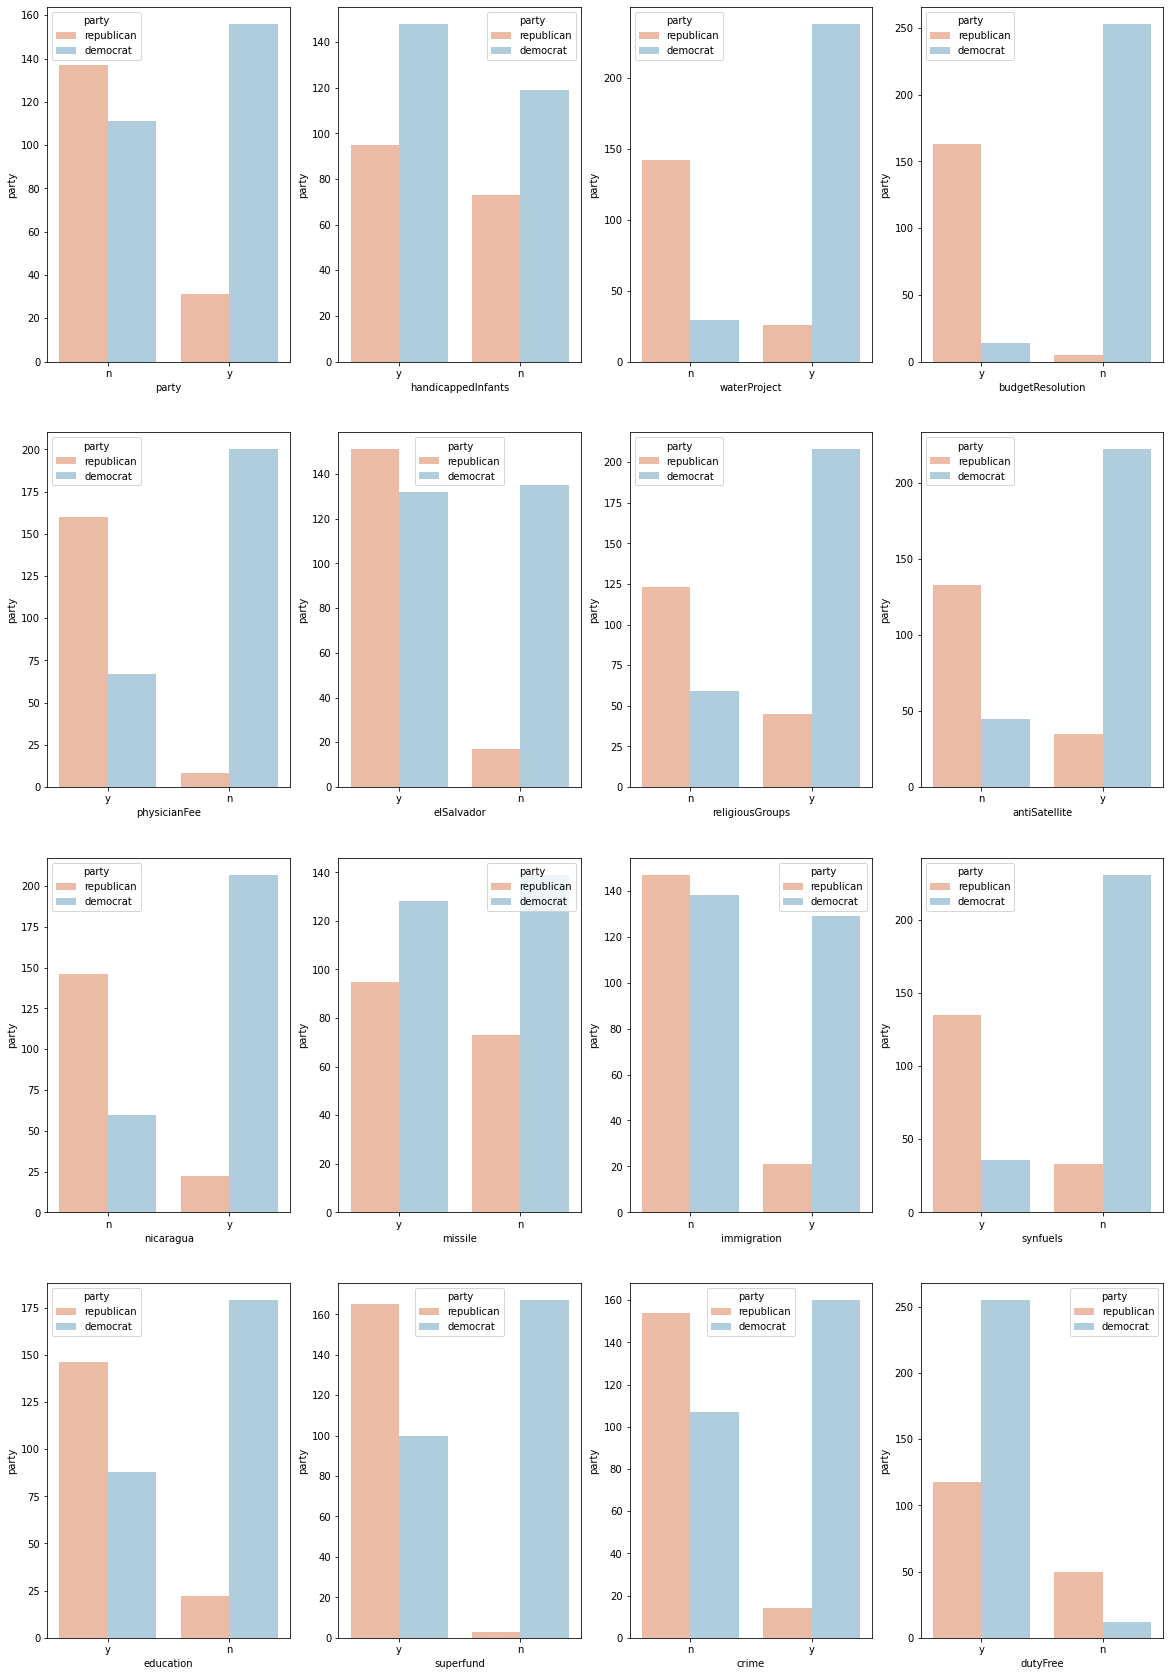

In [16]:
plt.figure(figsize=[20, 30])

for i in range(len(column_names[1:])):
    plt.subplot(4,4, i+1)
#     plt.bar(congress_filled_df[column_names[i+1]], congress_filled_df['party'])
    sns.countplot(x=column_names[i+1], hue='party', data=congress_filled_df, palette='RdBu')
    plt.ylabel('party')
    plt.xlabel(column_names[i])

plt.show()

In [29]:
congress_filled_df.replace(['n', 'y'],[0, 1], inplace=True)

y=congress_filled_df['party'].values

X=congress_filled_df.drop('party',axis=1).values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)

In [66]:
knn = KNeighborsClassifier(n_neighbors=7)

knn.fit(X_train,y_train)

y_pred = knn.predict(X_test)

print(classification_report(y_test, y_pred))

In [55]:
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]

hyperparameters = dict(leaf_size=leaf_size,n_neighbors=n_neighbors,p=p)

In [58]:
knn = KNeighborsClassifier()

clf = GridSearchCV(knn,hyperparameters,cv=10)

best_model = clf.fit(X,y)

#Print The value of best Hyperparameters
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

In [64]:
y_pred = best_model.predict(X_test)

print(classification_report(y_test, y_pred))